In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

from api import api_key
from citipy import citipy
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

612

In [3]:
weather_df = pd.DataFrame()
weather_df["City"] = cities
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Max Temp"] = ""
weather_df["Min Temp"] = ""
weather_df["Wind Speed"] = ""
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
0,cabo san lucas,,,,,,,,,
1,ushuaia,,,,,,,,,
2,saint anthony,,,,,,,,,
3,malysheva,,,,,,,,,
4,faya,,,,,,,,,


In [4]:
print("Beginning Data Retrieval")
print("_______________________________")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
for index, row in weather_df.iterrows():
    query_url = base_url + "units=Imperial&appid=" + api_key + "&q=" + row["City"]
    print("Processing Record " + str(index) + " | " + row["City"])
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        weather_df.loc[index, "Cloudiness"] = weather_json["clouds"]["all"]
        weather_df.loc[index, "Country"] = weather_json["sys"]["country"]
        weather_df.loc[index, "Date"] = weather_json["dt"]
        weather_df.loc[index, "Humidity"] = weather_json["main"]["humidity"]
        weather_df.loc[index, "Lat"] = weather_json["coord"]["lat"]
        weather_df.loc[index, "Lng"] = weather_json["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = weather_json["main"]["temp_max"]
        weather_df.loc[index, "Min Temp"] = weather_json["main"]["temp_min"]
        weather_df.loc[index, "Wind Speed"] = weather_json["wind"]["speed"]
    except (KeyError, ValueError):
        print("City not found. Skipping...")

print("_______________________________")
print("Data Retrieval Complete")

Beginning Data Retrieval
_______________________________
Processing Record 0 | cabo san lucas
Processing Record 1 | ushuaia
Processing Record 2 | saint anthony
Processing Record 3 | malysheva
Processing Record 4 | faya
Processing Record 5 | albany
Processing Record 6 | mataura
Processing Record 7 | mar del plata
Processing Record 8 | atuona
Processing Record 9 | santa maria
Processing Record 10 | rikitea
Processing Record 11 | belmonte
Processing Record 12 | batagay-alyta
Processing Record 13 | provideniya
Processing Record 14 | isla vista
Processing Record 15 | taolanaro
City not found. Skipping...
Processing Record 16 | busselton
Processing Record 17 | tuktoyaktuk
Processing Record 18 | punta arenas
Processing Record 19 | cape town
Processing Record 20 | rodrigues alves
Processing Record 21 | balkanabat
Processing Record 22 | bethel
Processing Record 23 | butaritari
Processing Record 24 | alzey
Processing Record 25 | kruisfontein
Processing Record 26 | pacific grove
Processing Record

Processing Record 224 | mikkeli
Processing Record 225 | roald
Processing Record 226 | bonavista
Processing Record 227 | maizuru
Processing Record 228 | merrill
Processing Record 229 | kavaratti
Processing Record 230 | moen
Processing Record 231 | kawana waters
City not found. Skipping...
Processing Record 232 | severo-kurilsk
Processing Record 233 | harrisburg
Processing Record 234 | bambous virieux
Processing Record 235 | misasi
Processing Record 236 | sobolevo
Processing Record 237 | port moresby
Processing Record 238 | luderitz
Processing Record 239 | paso de carrasco
Processing Record 240 | moyale
Processing Record 241 | vaitupu
City not found. Skipping...
Processing Record 242 | salalah
Processing Record 243 | los algarrobos
Processing Record 244 | nikolskoye
Processing Record 245 | ponta do sol
Processing Record 246 | mbacke
City not found. Skipping...
Processing Record 247 | norman wells
Processing Record 248 | buala
Processing Record 249 | mahebourg
Processing Record 250 | puer

Processing Record 451 | jalna
Processing Record 452 | kupang
Processing Record 453 | saravan
Processing Record 454 | axim
Processing Record 455 | ucluelet
Processing Record 456 | agadez
Processing Record 457 | riyadh
Processing Record 458 | atambua
Processing Record 459 | kerrobert
Processing Record 460 | galesong
Processing Record 461 | alanya
Processing Record 462 | bure
Processing Record 463 | bathsheba
Processing Record 464 | trelew
Processing Record 465 | college
Processing Record 466 | varkkallai
Processing Record 467 | sola
Processing Record 468 | ewa beach
Processing Record 469 | koslan
Processing Record 470 | swellendam
Processing Record 471 | phonhong
Processing Record 472 | koumac
Processing Record 473 | outjo
Processing Record 474 | roma
Processing Record 475 | cayenne
Processing Record 476 | fredericksburg
Processing Record 477 | meleuz
Processing Record 478 | ciras
City not found. Skipping...
Processing Record 479 | koungou
City not found. Skipping...
Processing Record 48

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Wind Speed
0,cabo san lucas,5,MX,1554582338,47,22.89,-109.91,82,73,10.29
1,ushuaia,90,AR,1554580800,64,-54.81,-68.31,39.2,39.2,6.93
2,saint anthony,75,US,1554582765,43,43.97,-111.68,50,42.8,21.92
3,malysheva,0,RU,1554580800,80,57.12,61.4,33.8,33.8,2.24
4,faya,0,SA,1554580800,68,18.39,42.45,64.4,64.4,5.82


In [6]:
max_temp = pd.to_numeric(weather_df["Max Temp"])
wind_speed = pd.to_numeric(weather_df["Wind Speed"])
cloudiness = pd.to_numeric(weather_df["Cloudiness"])
humidity = pd.to_numeric(weather_df["Humidity"])
lat = pd.to_numeric(weather_df["Lat"])
lng = pd.to_numeric(weather_df["Lng"])

Text(0, 0.5, 'Max Temperature (F)')

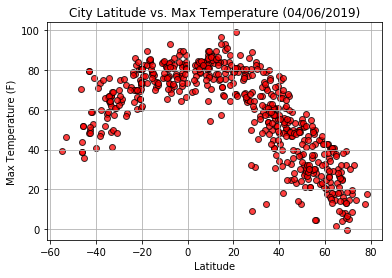

In [7]:
plt.scatter(lat, max_temp, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Max Temperature (" + datetime.today().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

Text(0, 0.5, 'Humidity (%)')

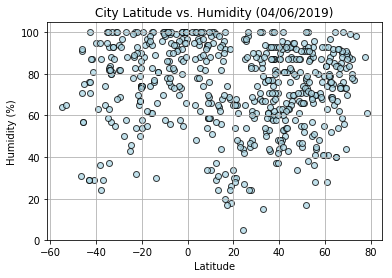

In [8]:
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Humidity (" + datetime.today().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

Text(0, 0.5, 'Cloudiness (%)')

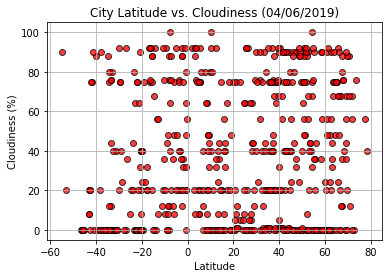

In [9]:
plt.scatter(lat, cloudiness, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Cloudiness (" + datetime.today().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

Text(0, 0.5, 'Wind Speed (mph)')

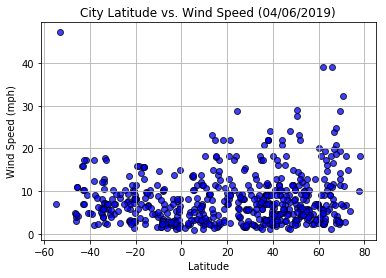

In [10]:
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Wind Speed (" + datetime.today().strftime('%m/%d/%Y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")